<a href="https://colab.research.google.com/github/analyst-ahsan/Python-Projects/blob/main/Online_Retail_Store_EDA_%2B_RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce DataSet EDA

## Data Exploration

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Loading Data Set

df = pd.read_csv('/content/Ecommerce_Dataset.csv', encoding='unicode_escape')

In [66]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [68]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [69]:
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [70]:
df.shape

(541909, 8)

In [71]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Data Cleaning

#### Dealing with duplicated rows and missing values

In [72]:
# Dealing with duplicated rows

df.duplicated().sum()
df_1 = df.drop_duplicates()

In [73]:
df_1.shape


(536641, 8)

In [74]:
df_1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [75]:
# Dealing with missing Values
df_1['Description'].fillna('Unknown', inplace=True)
df_1['CustomerID'].fillna('99', inplace=True)
df_1.dropna(subset = ['Country', 'UnitPrice'], inplace=True)

In [76]:
df_1.shape

(536641, 8)

In [77]:
df_1.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Data Processing

#### Changing Datatype

In [78]:
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'])
df_1['UnitPrice'] = pd.to_numeric(df_1['UnitPrice'])

#### Creating New Columns

In [79]:
# New Column - Total Amount
df_1['total_amount'] = df_1['Quantity'] * df_1['UnitPrice']

In [80]:
df_1['InvoiceDate'].dtype

dtype('<M8[ns]')

In [81]:
# Creating New DATE/TIME Columns

df_1['timestamp'] = df_1['InvoiceDate']
df_1['date_conv'] = df_1['timestamp'].dt.date
df_1['time_conv'] = df_1['timestamp'].dt.time
df_1['day_of_week'] = df_1['timestamp'].dt.day_name()
df_1['month'] = df_1['timestamp'].dt.month_name()
df_1['Year'] = df_1['timestamp'].dt.year
df_1['hour'] = df_1['timestamp'].dt.hour

In [82]:
# Finding Cancelled Orders and removing them

cancelled_order = df_1[df_1['Quantity'] < 0]
df_2 = df_1[df_1['Quantity'] >= 0]

In [83]:
# Invoices which are Bad Debts and removing them

debt_invoices = df_2[df_2['Description'].str.contains('debt')]
df_2 = df_2[~df_2['Description'].str.contains('debt')]

## Data Visuals


#### Monthly Sales

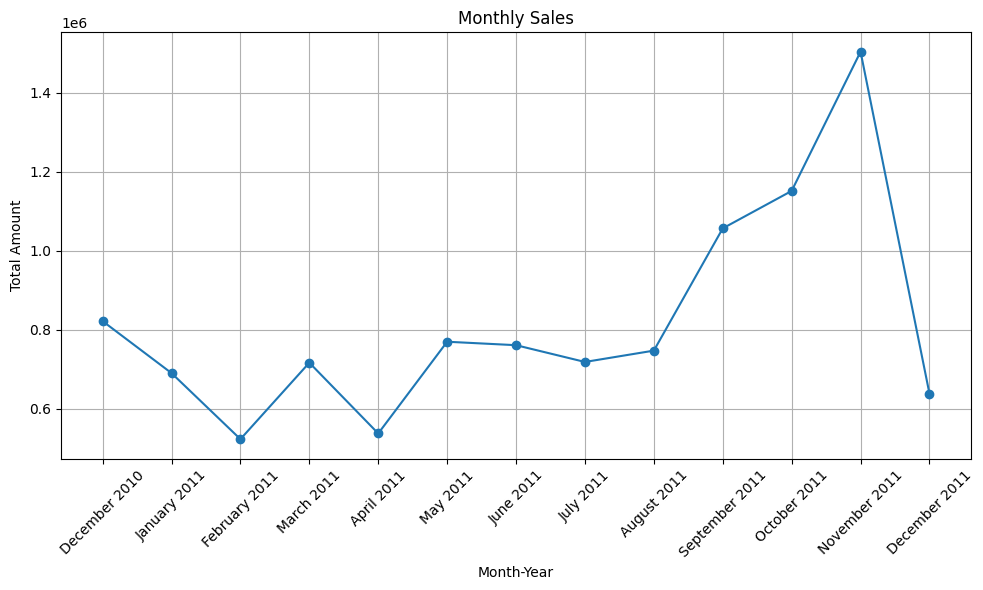

In [ ]:
monthly_sales = df_2.groupby(['month', 'Year'])['total_amount'].sum().reset_index()

# Combine 'month' and 'Year' into a single column
monthly_sales['month_year'] = monthly_sales['month'] + ' ' + monthly_sales['Year'].astype(str)

# Sort the data by 'Year' and 'month'
monthly_sales['month_order'] = pd.to_datetime(monthly_sales['month'], format='%B')
monthly_sales = monthly_sales.sort_values(by=['Year', 'month_order'])

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month_year'], monthly_sales['total_amount'], marker='o')

plt.title('Monthly Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Amount (In Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Hourly Sales

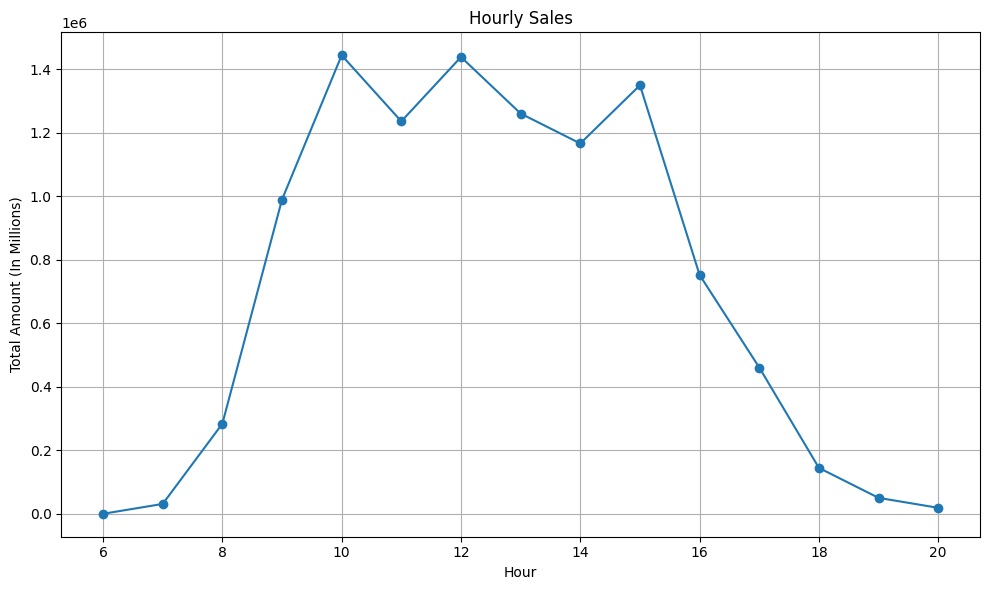

In [ ]:
hourly_sales = df_2.groupby('hour')['total_amount'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales['hour'], hourly_sales['total_amount'], marker='o')

plt.title('Hourly Sales')
plt.xlabel('Hour')
plt.ylabel('Total Amount (In Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Day Sales


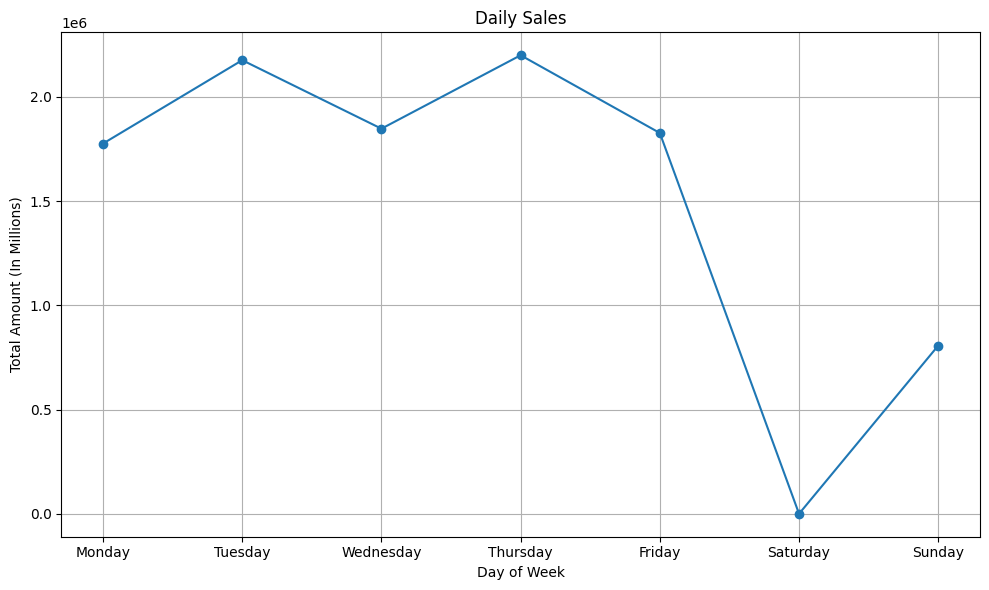

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_2['day_of_week'] = pd.Categorical(df_2['day_of_week'], categories=days_order, ordered=True)
day_sales = df_2.groupby('day_of_week')['total_amount'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(day_sales['day_of_week'], day_sales['total_amount'], marker='o')

plt.title('Daily Sales')
plt.xlabel('Day of Week')
plt.ylabel('Total Amount (In Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Top 5 Products Purchased

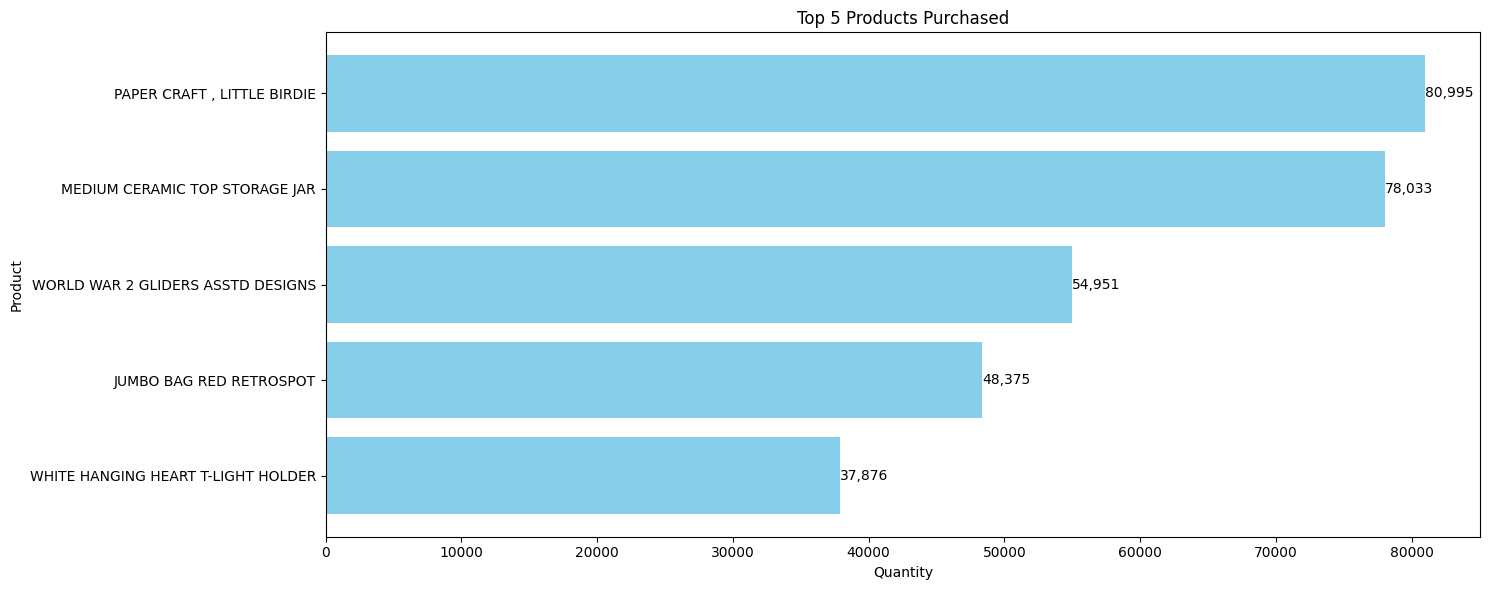

In [ ]:
products_purchased = df_2.groupby('Description')['Quantity'].sum().nlargest(5).reset_index()

plt.figure(figsize=(15, 6))
bars = plt.barh(products_purchased['Description'], products_purchased['Quantity'], color='skyblue')

plt.title('Top 5 Products Purchased')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.gca().invert_yaxis()

# Adding data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

#### Customer Distribution Country Wise

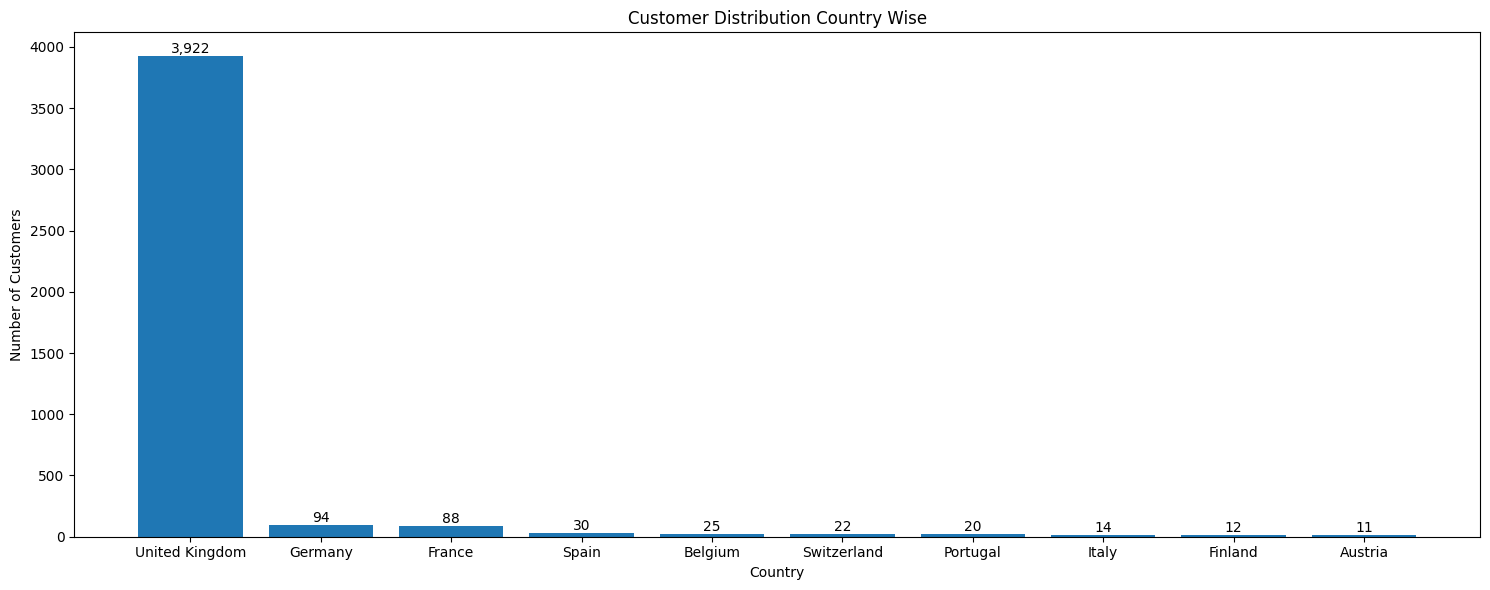

In [ ]:
country_distribution = df_2.groupby('Country')['CustomerID'].nunique().nlargest(10).reset_index()

plt.figure(figsize=(15, 6))
bars = plt.bar(country_distribution['Country'], country_distribution['CustomerID'])

plt.title('Customer Distribution Country Wise')
plt.xlabel('Country')
plt.ylabel('Number of Customers')

# Adding data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{int(bar.get_height()):,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### Sales Distribution Country Wise


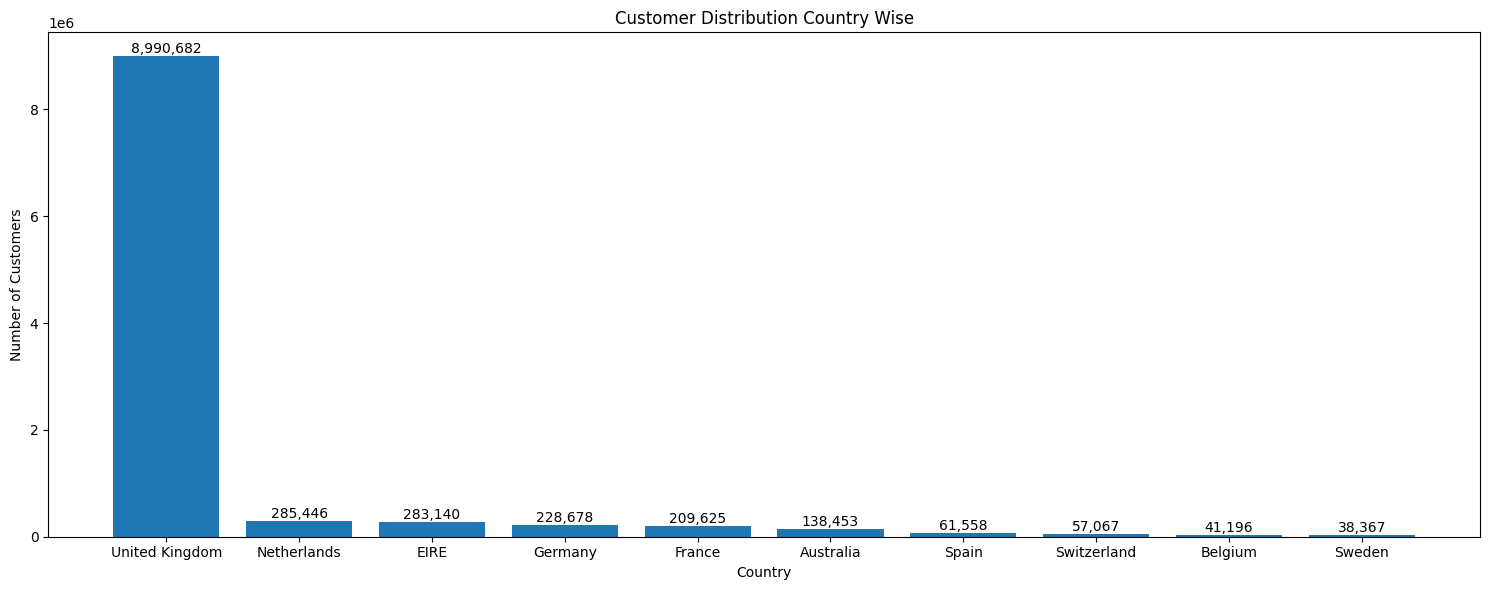

In [ ]:
country_sales = df_2.groupby('Country')['total_amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(15, 6))
bars = plt.bar(country_sales['Country'], country_sales['total_amount'])

plt.title('Customer Distribution Country Wise')
plt.xlabel('Country')
plt.ylabel('Number of Customers')

# Adding data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{int(bar.get_height()):,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## RFM Analysis - Customer Segmentation

In [141]:
df_3 = df_2[['CustomerID', 'total_amount', 'date_conv', 'InvoiceNo']]
df_3 = df_3[df_3['CustomerID'] != 99]

In [147]:
monetory_grouped = df_3.groupby('CustomerID')['total_amount'].sum().reset_index()
frequency_grouped = df_3.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
recency_grouped = df_3.groupby('CustomerID')['date_conv'].max().reset_index()

In [150]:
max_date = pd.to_datetime(df_3['date_conv'].max())
recency_grouped['recency'] = (max_date - pd.to_datetime(recency_grouped['date_conv'])).dt.days
recency_grouped = recency_grouped[['CustomerID', 'recency']]

In [189]:
merged = pd.merge(monetory_grouped, frequency_grouped, on='CustomerID')
merged = pd.merge(merged, recency_grouped, on='CustomerID')
merged.columns = ['CustomerID', 'monetory', 'frequency', 'recency']
merged.head()

,CustomerID,monetory,frequency,recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,7,2
2,12348.0,1797.24,4,75
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,310


Text(0.5, 0, 'Attributes')

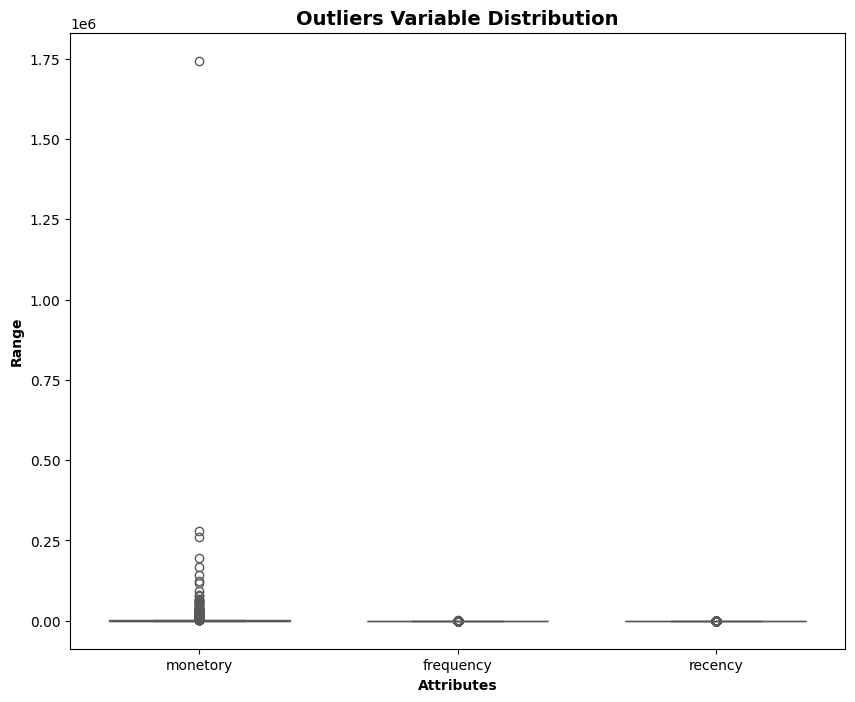

In [172]:
attributes = ['monetory','frequency','recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = merged[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [173]:
# Removing (statistical) outliers for Amount
Q1 = merged.monetory.quantile(0.05)
Q3 = merged.monetory.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.monetory >= Q1 - 1.5*IQR) & (merged.monetory <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = merged.recency.quantile(0.05)
Q3 = merged.recency.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.recency >= Q1 - 1.5*IQR) & (merged.recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = merged.frequency.quantile(0.05)
Q3 = merged.frequency.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.frequency >= Q1 - 1.5*IQR) & (merged.frequency <= Q3 + 1.5*IQR)]

In [174]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

rfm = merged[['monetory', 'frequency', 'recency']]
rfm_scaled = StandardScaler().fit_transform(rfm)
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)
kmeans.labels_

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [175]:
set(kmeans.labels_)

{0, 1, 2, 3}

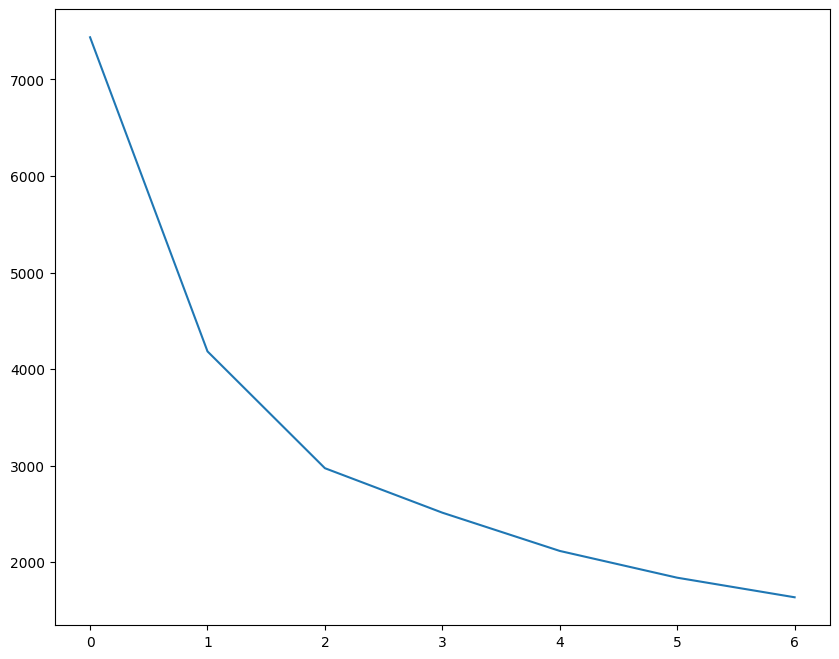

In [176]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [177]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [178]:
 kmeans.labels_

array([1, 2, 2, ..., 2, 1, 2], dtype=int32)

In [179]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,monetory,frequency,recency,Cluster_Id
1,4310.00,7,2,1
2,1797.24,4,75,2
3,1757.55,1,18,2
4,334.40,1,310,0
5,2506.04,8,36,2


<Axes: xlabel='Cluster_Id', ylabel='monetory'>

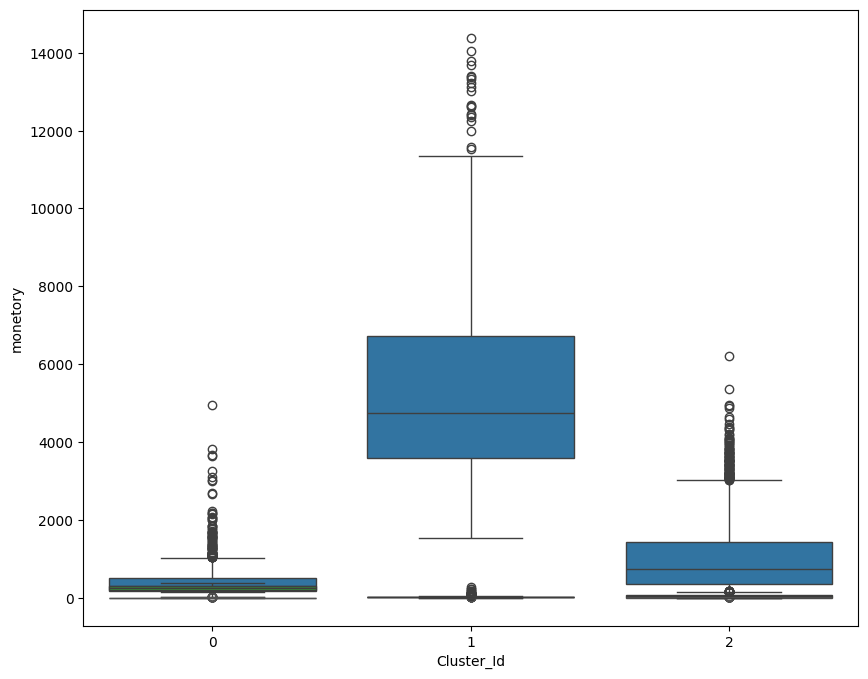

In [185]:
sns.boxplot(x='Cluster_Id', y='monetory', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='frequency'>

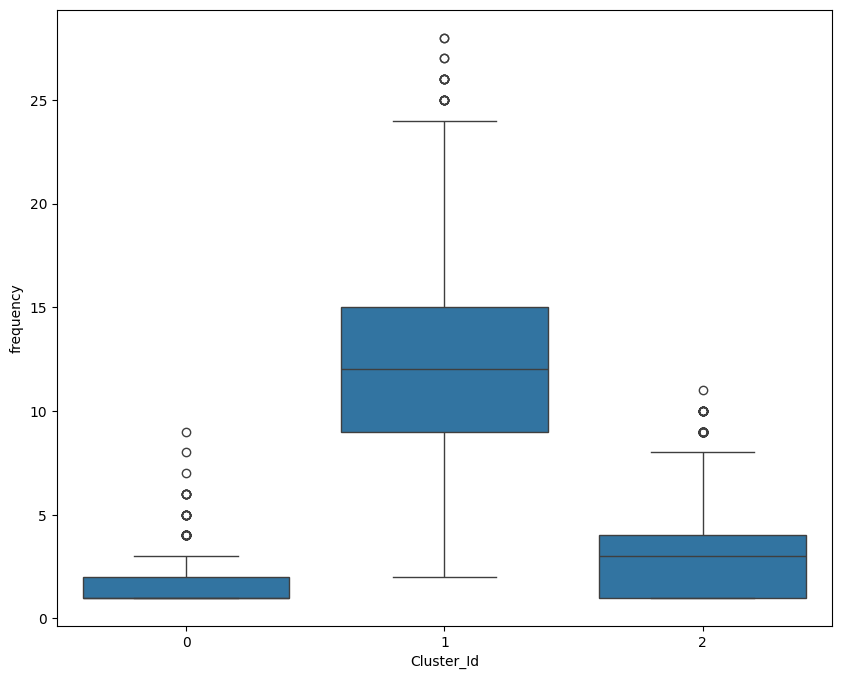

In [183]:
sns.boxplot(x='Cluster_Id', y='frequency', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='recency'>

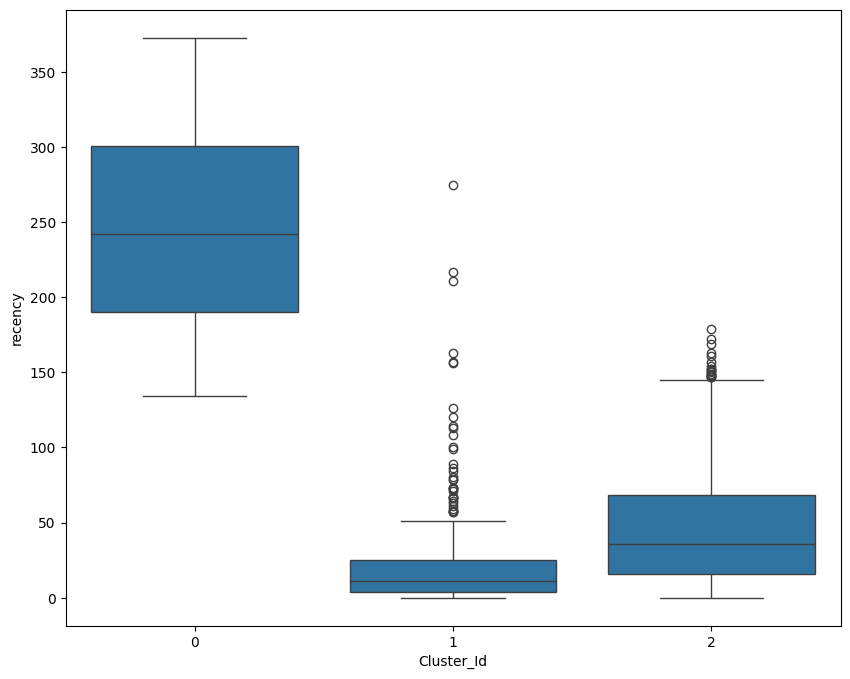

In [186]:
sns.boxplot(x='Cluster_Id', y='recency', data=rfm)

In [188]:
summary = rfm.groupby('Cluster_Id').agg({'monetory': ['mean'], 'frequency': ['mean'], 'recency': ['mean']})
summary

,monetory,frequency,recency
,mean,mean,mean
Cluster_Id,,,
0,432.305509,1.484934,247.537665
1,5459.778902,12.507009,20.775701
2,1018.760531,3.086941,45.432179
